In [1]:
import torch
from torch.optim import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../raw_data/cars.csv', index_col='Unnamed: 0')
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [3]:
x= torch.FloatTensor( df['speed'].values )
y= torch.FloatTensor( df['dist'].values )

In [8]:
w = torch.empty( 1, requires_grad=True)
b = torch.empty( 1, requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.1144], requires_grad=True)

In [10]:
def cost():
    hx = w*x + b
    c = torch.mean( (hx-y)**2)
    return c

In [11]:
optimizer = Adam( [w,b] ,lr=0.01 )
for epoch in range(2000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print('cost', c.item() )

cost 1302.9638671875
cost 1291.9100341796875
cost 1280.9173583984375
cost 1269.986083984375
cost 1259.1181640625
cost 1248.31396484375
cost 1237.574462890625
cost 1226.90087890625
cost 1216.293701171875
cost 1205.754150390625
cost 1195.2830810546875
cost 1184.8807373046875
cost 1174.548583984375
cost 1164.287109375
cost 1154.096923828125
cost 1143.978759765625
cost 1133.93310546875
cost 1123.9605712890625
cost 1114.0618896484375
cost 1104.2373046875
cost 1094.4873046875
cost 1084.812255859375
cost 1075.2130126953125
cost 1065.689208984375
cost 1056.2415771484375
cost 1046.8702392578125
cost 1037.5753173828125
cost 1028.357177734375
cost 1019.216064453125
cost 1010.151611328125
cost 1001.1644287109375
cost 992.2544555664062
cost 983.42138671875
cost 974.6654052734375
cost 965.9866943359375
cost 957.385009765625
cost 948.860107421875
cost 940.4120483398438
cost 932.0408325195312
cost 923.74609375
cost 915.5277099609375
cost 907.385498046875
cost 899.3192138671875
cost 891.3287353515625
c

In [12]:
def hxFn( xdata ):
    xd = torch.FloatTensor( xdata )
    hx = w*xd + b
    return hx.detach().numpy() # requires_grad=True 인 텐서node 는 hx.detach().numpy()

In [13]:
hxFn( [5, 7])

array([12.197458, 18.38631 ], dtype=float32)

In [14]:
pred = hxFn( x )
pred

array([ 9.103032,  9.103032, 18.38631 , 18.38631 , 21.480736, 24.575161,
       27.669588, 27.669588, 27.669588, 30.764015, 30.764015, 33.85844 ,
       33.85844 , 33.85844 , 33.85844 , 36.952866, 36.952866, 36.952866,
       36.952866, 40.047295, 40.047295, 40.047295, 40.047295, 43.14172 ,
       43.14172 , 43.14172 , 46.236145, 46.236145, 49.33057 , 49.33057 ,
       49.33057 , 52.424995, 52.424995, 52.424995, 52.424995, 55.519424,
       55.519424, 55.519424, 58.61385 , 58.61385 , 58.61385 , 58.61385 ,
       58.61385 , 64.802704, 67.897125, 70.991554, 70.991554, 70.991554,
       70.991554, 74.08598 ], dtype=float32)

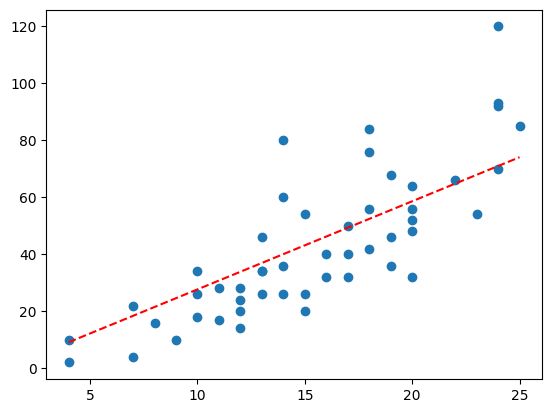

In [15]:
plt.scatter( x,y )
plt.plot( x, pred,'r--')
plt.show()